#Importing Libraries / Dependencies

In [ ]:
import pandas as pd
import numpy as np
import pyarrow.dataset as ds
import pyarrow.parquet as pq
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
print('All good!')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

reading the dataset as a data frame

In [ ]:
file_name = "/content/drive/MyDrive/Sorrentum/bulk.airflow.downloaded_1min.parquet.ohlcv.futures.v7.ccxt.binance.v1_0_0"
schema = None
partitioning = ds.partitioning(schema, flavor="hive")
dataset = pq.ParquetDataset(
    # Replace URI with path.
    file_name,
    #filesystem=filesystem,
    #filters=filters,
    partitioning=partitioning,
    use_legacy_dataset=False,
)
# To read also the index we need to use `read_pandas()`, instead of
# `read_table()`.
# See https://arrow.apache.org/docs/python/parquet.html#reading-and-writing-single-files.
columns = None
table = dataset.read_pandas(columns=columns)
df = table.to_pandas()

print(df.head())



                               timestamp   open   high    low  close   volume  \
timestamp                                                                       
2022-10-01 00:00:00+00:00  1664582400000  5.406  5.406  5.401  5.403  20601.0   
2022-10-01 00:01:00+00:00  1664582460000  5.403  5.404  5.401  5.403   7417.0   
2022-10-01 00:02:00+00:00  1664582520000  5.403  5.407  5.403  5.407   4555.0   
2022-10-01 00:03:00+00:00  1664582580000  5.406  5.408  5.404  5.405  11194.0   
2022-10-01 00:04:00+00:00  1664582640000  5.404  5.406  5.404  5.405   1942.0   

                          exchange_id              knowledge_timestamp  \
timestamp                                                                
2022-10-01 00:00:00+00:00     binance 2022-10-02 00:17:30.835182+00:00   
2022-10-01 00:01:00+00:00     binance 2022-10-02 00:17:30.835182+00:00   
2022-10-01 00:02:00+00:00     binance 2022-10-02 00:17:30.835182+00:00   
2022-10-01 00:03:00+00:00     binance 2022-10-02 00:17:30.8351

In [ ]:
# df=pd.read_csv("/content/drive/MyDrive/Sorrentum/data1sec.csv")

In [ ]:
df.head()

,timestamp,open,high,low,close,volume,exchange_id,knowledge_timestamp,currency_pair,year,month
timestamp,,,,,,,,,,,
2022-10-01 00:00:00+00:00,1664582400000,5.406,5.406,5.401,5.403,20601.0,binance,2022-10-02 00:17:30.835182+00:00,APE_USDT,2022,10
2022-10-01 00:01:00+00:00,1664582460000,5.403,5.404,5.401,5.403,7417.0,binance,2022-10-02 00:17:30.835182+00:00,APE_USDT,2022,10
2022-10-01 00:02:00+00:00,1664582520000,5.403,5.407,5.403,5.407,4555.0,binance,2022-10-02 00:17:30.835182+00:00,APE_USDT,2022,10
2022-10-01 00:03:00+00:00,1664582580000,5.406,5.408,5.404,5.405,11194.0,binance,2022-10-02 00:17:30.835182+00:00,APE_USDT,2022,10
2022-10-01 00:04:00+00:00,1664582640000,5.404,5.406,5.404,5.405,1942.0,binance,2022-10-02 00:17:30.835182+00:00,APE_USDT,2022,10


In [ ]:
df.tail()

,timestamp,open,high,low,close,volume,exchange_id,knowledge_timestamp,currency_pair,year,month
timestamp,,,,,,,,,,,
2023-01-12 23:55:00+00:00,1673567700000,0.3749,0.3749,0.3745,0.3745,1020181.9,binance,2023-01-13 00:17:44.882878+00:00,XRP_USDT,2023,1
2023-01-12 23:56:00+00:00,1673567760000,0.3746,0.3748,0.3745,0.3747,1205213.5,binance,2023-01-13 00:17:44.882878+00:00,XRP_USDT,2023,1
2023-01-12 23:57:00+00:00,1673567820000,0.3748,0.3749,0.3746,0.3747,821263.4,binance,2023-01-13 00:17:44.882878+00:00,XRP_USDT,2023,1
2023-01-12 23:58:00+00:00,1673567880000,0.3748,0.3748,0.3746,0.3747,481202.9,binance,2023-01-13 00:17:44.882878+00:00,XRP_USDT,2023,1
2023-01-12 23:59:00+00:00,1673567940000,0.3748,0.3748,0.3745,0.3746,1115648.1,binance,2023-01-13 00:17:44.882878+00:00,XRP_USDT,2023,1


In [ ]:
df.isna().sum()

timestamp              0
open                   0
high                   0
low                    0
close                  0
volume                 0
exchange_id            0
knowledge_timestamp    0
currency_pair          0
year                   0
month                  0
dtype: int64

One year Data analysis

In [ ]:
year_2022 = df.loc[(df.index >= '2022-1-01') & (df.index < '2023-01-01')]

year_2022 = year_2022.drop(['timestamp','high','low','volume','exchange_id','knowledge_timestamp','year','month'],axis=1)
year_2022

,open,close,currency_pair
timestamp,,,
2022-10-01 00:00:00+00:00,5.4060,5.4030,APE_USDT
2022-10-01 00:01:00+00:00,5.4030,5.4030,APE_USDT
2022-10-01 00:02:00+00:00,5.4030,5.4070,APE_USDT
2022-10-01 00:03:00+00:00,5.4060,5.4050,APE_USDT
2022-10-01 00:04:00+00:00,5.4040,5.4050,APE_USDT
...,...,...,...
2022-09-30 23:55:00+00:00,0.4798,0.4795,XRP_USDT
2022-09-30 23:56:00+00:00,0.4795,0.4791,XRP_USDT
2022-09-30 23:57:00+00:00,0.4791,0.4795,XRP_USDT


In [ ]:
pair = year_2022.currency_pair.unique()

In [ ]:

year_2022 = year_2022.reset_index(level=0)

year_2022.head()

,timestamp,open,close,currency_pair
0,2022-10-01 00:00:00+00:00,5.406,5.403,APE_USDT
1,2022-10-01 00:01:00+00:00,5.403,5.403,APE_USDT
2,2022-10-01 00:02:00+00:00,5.403,5.407,APE_USDT
3,2022-10-01 00:03:00+00:00,5.406,5.405,APE_USDT
4,2022-10-01 00:04:00+00:00,5.404,5.405,APE_USDT


In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
for p in pair:
  temp = year_2022.loc[year_2022['currency_pair'] == p]
  temp1 = temp.groupby(temp['timestamp'].dt.strftime('%B'))[['open','close']].mean()
  
  temp1 = round(temp1.reindex(month_order, axis=0),2)
  temp1 = temp1.reset_index()

  fig = px.bar(temp1, x='timestamp', y=['open','close'], barmode='group', title = p + ' Monthly Average Open & Close Price - Year 2022')
  fig.show()
  fig = px.line(temp1, x="timestamp", y="close", title= p + ' Close price over time')
  fig.show()

In [ ]:
# months_2022 = year_2022.groupby(year_2022['timestamp'].dt.strftime('%B'))[['open','close']].mean()
# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
#              'September', 'October', 'November', 'December']
# months_2022 = round(months_2022.reindex(month_order, axis=0),2)
# months_2022 = months_2022.reset_index()

In [ ]:
# months_2022

In [ ]:
# fig = px.bar(months_2022, x='timestamp', y=['open','close'], barmode='group', title = 'Monthly Average Open & Close Price - Year 2020')
# fig.show()

In [ ]:
# #Out of RAM

# fig = px.line(df, x="timestamp", y="close", title='coin Close price over time')
# fig.show()

One Week Data 1/1/23 - 1/7/23

In [ ]:
week_2023 = df.loc[(df.index >= '2023-1-01') & (df.index < '2023-01-08')]

week_2023 = week_2023.drop(['timestamp','high','low','volume','exchange_id','knowledge_timestamp','year','month'],axis=1)
week_2023

,open,close,currency_pair
timestamp,,,
2023-01-02 00:00:00+00:00,3.8630,3.8620,APE_USDT
2023-01-02 00:01:00+00:00,3.8620,3.8640,APE_USDT
2023-01-02 00:02:00+00:00,3.8640,3.8540,APE_USDT
2023-01-02 00:03:00+00:00,3.8540,3.8500,APE_USDT
2023-01-02 00:04:00+00:00,3.8500,3.8440,APE_USDT
...,...,...,...
2023-01-06 23:55:00+00:00,0.3445,0.3446,XRP_USDT
2023-01-06 23:56:00+00:00,0.3446,0.3445,XRP_USDT
2023-01-06 23:57:00+00:00,0.3445,0.3444,XRP_USDT


In [ ]:
pair = week_2023.currency_pair.unique()
week_2023 = week_2023.reset_index(level=0)
week_2023.head()

,timestamp,open,close,currency_pair
0,2023-01-02 00:00:00+00:00,3.863,3.862,APE_USDT
1,2023-01-02 00:01:00+00:00,3.862,3.864,APE_USDT
2,2023-01-02 00:02:00+00:00,3.864,3.854,APE_USDT
3,2023-01-02 00:03:00+00:00,3.854,3.850,APE_USDT
4,2023-01-02 00:04:00+00:00,3.850,3.844,APE_USDT


#LSTM Model (using one week data)

In [ ]:
temp = week_2023.loc[week_2023['currency_pair'] == 'APE_USDT']

In [ ]:
model_data = temp[['timestamp','close']]

In [ ]:
del model_data['timestamp']
scaler = MinMaxScaler(feature_range=(0,1))
close_df = scaler.fit_transform(np.array(model_data).reshape(-1,1))


In [ ]:
training_size = int(len(close_df)*0.9)
test_size = len(close_df)-training_size
train_data,test_data = close_df[0:training_size,:],close_df[training_size:len(close_df),:1]
print('train_data: ', train_data.shape)
print('test_data: ', test_data.shape)

train_data:  (9072, 1)
test_data:  (1008, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 10 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (9061, 10, 1)
X_test:  (997, 10, 1)


#Model Building

In [ ]:
model = Sequential() 
# Adding a LSTM layer with 10 internal units
model.add(LSTM(10,input_shape=(None,1),activation='relu'))
# Adding a Dense layer with 1 units.
model.add(Dense(1))
# Loss function + optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# Better PC to process

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10,verbose=1)

Epoch 1/100
907/907 [==============================] - 15s 10ms/step - loss: 0.0064 - val_loss: 1.3312e-04
Epoch 2/100
907/907 [==============================] - 6s 6ms/step - loss: 3.5492e-04 - val_loss: 5.9086e-05
Epoch 3/100
907/907 [==============================] - 7s 8ms/step - loss: 2.8220e-04 - val_loss: 5.5464e-05
Epoch 4/100
907/907 [==============================] - 6s 7ms/step - loss: 2.6590e-04 - val_loss: 5.2246e-05
Epoch 5/100
907/907 [==============================] - 7s 8ms/step - loss: 2.5223e-04 - val_loss: 4.6846e-05
Epoch 6/100
907/907 [==============================] - 7s 8ms/step - loss: 2.4039e-04 - val_loss: 4.9373e-05
Epoch 7/100
907/907 [==============================] - 6s 7ms/step - loss: 2.2569e-04 - val_loss: 4.5276e-05
Epoch 8/100
907/907 [==============================] - 7s 8ms/step - loss: 2.1041e-04 - val_loss: 3.2348e-04
Epoch 9/100
907/907 [==============================] - 6s 7ms/step - loss: 2.0513e-04 - val_loss: 3.7016e-05
Epoch 10/100
907/907 

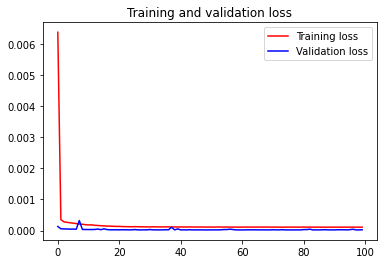

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

#Model Prediction

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
look_back=time_step
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_df)-1, :] = test_predict
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
plotdf = pd.DataFrame({'date': temp['timestamp'],
                       'original_close': temp['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original vs predicted close price',
                  plot_bgcolor='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

32/32 [==============================] - 0s 3ms/step


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 60
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
temp_mat = np.empty(pred_days+1)
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]
next_predicted_days_value = temp_mat
next_predicted_days_value = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'Predicted Close':next_predicted_days_value
})
names = cycle(['Predicted next 60 days close price'])
fig = px.line(new_pred_plot,x=new_pred_plot.index, y= new_pred_plot['Predicted Close'],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Next 60 days Closing price prediction',
                  plot_bgcolor='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Model Evaluation

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("-------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data RMSE:  0.006464468015075256
Train data MSE:  4.178934671793102e-05
Train data MAE:  0.0027570799631915087
-------------------------------------------------------------------------------------
Test data RMSE:  0.0032624733981736534
Test data MSE:  1.0643732673790747e-05
Test data MAE:  0.0024633267019074805
-------------------------------------------------------------------------------------
Train data R2 score: 0.9981425400049504
Test data R2 score: 0.9940018697131544
